### Building a Boolean-Based Model

This simple example demonstrates how to create a boolean-based model, its components, regulators, conditions and sub-conditions into [Cell Collective](https://cellcollective.org).

We'll attempt to reconstruct the [Cortical Area Development](https://research.cellcollective.org/?dashboard=true#2035:1/cortical-area-development/1) authored by CE Giacomantonio.

![](data/images/cortical-area-development.png)

Begin by importing the CCPy module into your workspace.

In [16]:
import cc

Now, let’s try creating a client object in order to interact with services provided by [Cell Collective](https://cellcollective.org).

In [17]:
client = cc.Client()

Authenticate your client using a ***password flow type authentication*** scheme.

**NOTE**: *Before you can authenticate using CCPy, you must first register an application of the appropriate type on [Cell Collective](https://cellcollective.org). If you do not require a user context, it is read only.*

In [3]:
client.auth(email = "test@cellcollective.org", password = "test")

### Cortical Area Development

Create a Base Model using CCPy and instantize it with an authenticated client.

In [4]:
model = cc.Model("Cortical Area Development", client = client)
model.save()

ID,80974
Name,Cortical Area Development
Memory Address,0x07f35e4ef6be0
Number of Versions,1
Versions,[<BooleanModel 80974 at 0x07f35e4ef6c50>]


A `cc.Model` consists of various `cc.ModelVersion` objects that help you build various versions to a model. By default, a `cc.Model` provides you a default model version of a boolean type. 

In [5]:
# get the default model version
boolean      = model.versions[0]
boolean.name = "Version 1"
boolean

ID,80974
Version,1
Name,Version 1
Memory Address,0x07f35e4ef6c50
Number of Components,0
Components,


First, we need to create a list of component objects for this model.

In [6]:
# create components
COUP_TFI = cc.InternalComponent("COUP-TFI")
EMX2     = cc.InternalComponent("EMX2")
FGF8     = cc.InternalComponent("FGF8")
PAX6     = cc.InternalComponent("PAX6")
Sp8      = cc.InternalComponent("Sp8")

Now let us add a list of components to our Boolean Model.

In [7]:
# add components to model
boolean.add_components(COUP_TFI, EMX2, FGF8, PAX6, Sp8)

Ensure you save your model in order to commit your work.

In [8]:
model.save()

ID,80974
Name,Cortical Area Development
Memory Address,0x07f35e4ef6be0
Number of Versions,1
Versions,[<BooleanModel 80974 at 0x07f35e4ef6c50 name='Version 1'>]


In [9]:
boolean.components

[<InternalComponent 1736648 at 0x07f35e4ea9d68 name='COUP-TFI'>,
 <InternalComponent 1736649 at 0x07f35e4ea9d30 name='EMX2'>,
 <InternalComponent 1736646 at 0x07f35e4ea9da0 name='FGF8'>,
 <InternalComponent 1736647 at 0x07f35e4ea9dd8 name='PAX6'>,
 <InternalComponent 1736645 at 0x07f35e4ea9e10 name='Sp8'>]

Let's add a list of regulators and conditions to our components. A list of regulators and conditions as well as sub-conditions can all be added at once to a component.

In [10]:
# add regulators to components
COUP_TFI.add_regulators(
    cc.NegativeRegulator(Sp8),
    cc.NegativeRegulator(FGF8)
)
EMX2.add_regulators(
    cc.PositiveRegulator(COUP_TFI),
    cc.NegativeRegulator(FGF8),
    cc.NegativeRegulator(PAX6),
    cc.NegativeRegulator(Sp8)
)
Sp8.add_regulators(
    cc.PositiveRegulator(FGF8),
    cc.NegativeRegulator(EMX2)
)
FGF8.add_regulators(
    # add conditions to regulators
    cc.PositiveRegulator(FGF8, conditions = [
        cc.Condition(components = Sp8)
    ])
)
PAX6.add_regulators(
    cc.PositiveRegulator(Sp8),
    cc.NegativeRegulator(COUP_TFI)
)

In [11]:
model.save()

ID,80974
Name,Cortical Area Development
Memory Address,0x07f35e4ef6be0
Number of Versions,1
Versions,[<BooleanModel 80974 at 0x07f35e4ef6c50 name='Version 1'>]


We've now got things within our Boolean Model.

In [12]:
boolean

ID,80974
Version,1
Name,Version 1
Memory Address,0x07f35e4ef6c50
Number of Components,5
Components,"COUP-TFI, EMX2, FGF8, PAX6, Sp8"


### Model Summary

You can view detailed summary of your model using the `summary` function provided.

In [13]:
boolean.summary()

Internal Components (+, -) External Components
-------------------------- -------------------
COUP-TFI (0,2)             
EMX2 (1,3)                 
FGF8 (1,0)                 
PAX6 (1,1)                 
Sp8 (1,1)                  


### Model Rendering

You can also attempt to visualize a Boolean Model using the `draw` function provided.

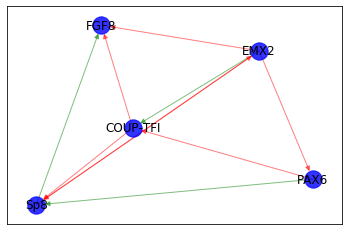

In [15]:
boolean.draw()